## 1: Removing all unnecessary variables 

In [8]:
bike_sharing.drop(["casual" , "registered" , "dteday" , "instant"] , axis = 1 , inplace = True)

In [9]:
bike_sharing.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [10]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
bike_sharing.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.995890    0.690411   
std      1.110184    0.500343    3.450215    0.167266    2.000339    0.462641   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

##  2: Removing of columns

In [14]:
bike_sharing.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike_sharing.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_sharing.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike_sharing.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [15]:
bike_sharing.head()

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  Spring   0  Jan        0     Monday           1      Misty  14.110847   
1  Spring   0  Jan        0    Tuesday           1      Misty  14.902598   
2  Spring   0  Jan        0  Wednesday           1      Clear   8.050924   
3  Spring   0  Jan        0   Thursday           1      Clear   8.200000   
4  Spring   0  Jan        0     Friday           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [16]:
cat_cols = ['mnth', 'season', 'weekday' , 'weathersit']

In [17]:
dummies_vars= pd.get_dummies(bike_sharing[cat_cols] , drop_first = True )
bike_sharing = pd.concat([bike_sharing,dummies_vars] , axis = 1)

In [18]:
bike_sharing.drop(['season', 'mnth' , 'weekday' , 'weathersit'] , axis=1 , inplace = True)

In [19]:
bike_sharing.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   mnth_Aug  mnth_Dec  ...  season_Summer  season_Winter  weekday_Monday  \
0         0         0  ...              0              0               1   
1         0         0  ...              0              0               0   
2         0         0  ...              0              0               0   
3         0         0  ...              0              0               0   
4         0         0  ...              0              0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                 0               0                 0                0   
1                 0               0                 0                1   
2                 0               0                 0                0   
3                 0               0                 1                0   
4                 0               0                 0                0   

   weekday_Wednesday  weathersit_Light_rainsnow  weathersit_Misty  
0                  0                          0                 1  
1                  0                          0                 1  
2                  1                          0                 0  
3                  0                          0                 0  
4                  0                          0                 0  

[5 rows x 30 columns]

In [2]:
bike_sharing.shape

NameError: name 'bike_sharing' is not defined

## 3: Dividing the Data to check it's training and sets of testing

In [21]:
bike_train, bike_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [25]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [24]:
scaler = MinMaxScaler()

In [26]:
num_vars = ['temp' ,'atemp', 'hum', 'windspeed' , 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [27]:
bike_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           0  0.345824  0.318819  0.751824   0.380981   

          cnt  mnth_Aug  mnth_Dec  ...  season_Summer  season_Winter  \
576  0.827658         0         0  ...              0              0   
426  0.465255         0         0  ...              0              0   
728  0.204096         0         1  ...              0              0   
482  0.482973         0         0  ...              1              0   
111  0.191095         0         0  ...              1              0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thursday  \
576               0                 0               0                 0   
426               0                 0               1                 0   
728               1                 0               0                 0   
482               0                 0               1                 0   
111               0                 0               1                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_Light_rainsnow  \
576                0                  1                          0   
426                0                  0                          0   
728                0                  0                          0   
482                0                  0                          0   
111                0                  0                          0   

     weathersit_Misty  
576                 0  
426                 1  
728                 0  
482                 1  
111                 1  

[5 rows x 30 columns]

In [28]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.453386    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    mnth_Aug    mnth_Dec  ...  season_Summer  \
count  510.000000  510.000000  510.000000  510.000000  ...     510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...       0.247059   
std      0.169803    0.224421    0.294988    0.278131  ...       0.431725   
min      0.000000    0.000000    0.000000    0.000000  ...       0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...       0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...       0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...       0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...       1.000000   

       season_Winter  weekday_Monday  weekday_Saturday  weekday_Sunday  \
count     510.000000      510.000000        510.000000      510.000000   
mean        0.247059        0.154902          0.129412        0.137255   
std         0.431725        0.362166          0.335985        0.344454   
min         0.000000        0.000000          0.000000        0.000000   
25%         0.000000        0.000000          0.000000        0.000000   
50%         0.000000        0.000000          0.000000        0.000000   
75%         0.000000        0.000000          0.000000        0.000000   
max         1.000000        1.000000          1.000000        1.000000   

       weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
count        510.000000       510.000000         510.000000   
mean           0.143137         0.152941           0.135294   
std            0.350557         0.360284           0.342373   
min            0.000000         0.000000           0.000000   
25%            0.000000         0.000000           0.000000   
50%            0.000000         0.000000           0.000000   
75%            0.000000         0.000000           0.000000   
max            1.000000         1.000000           1.000000   

       weathersit_Light_rainsnow  weathersit_Misty  
count                 510.000000        510.000000  
mean                    0.029412          0.345098  
std                     0.169124          0.475867  
min                     0.000000          0.000000  
25%                     0.000000          0.000000  
50%                     0.000000          0.000000  
75%                     0.000000          1.000000  
max                     1.000000          1.000000  

[8 rows x 30 columns]

### Dividing into X and Y sets for the model building

In [29]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## 4: Analysis dillydally:

In [60]:
y_train_cnt = lm5.predict(X_train_5)

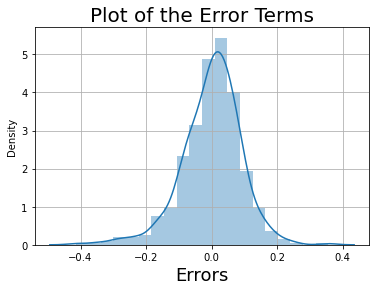

In [61]:
sns.distplot((y_train - y_train_cnt), bins = 20) 
plt.title('Plot of the Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 
plt.grid()
plt.show()

#### Inference:
- Error terms are normally distributed with mean 0

## 5: Correction of R2 and adjusting of it's R2 values

In [69]:
results = pd.DataFrame(index=["Train data","Test data"])
results["r_square"]=[0.835,0.805] 
results["Adjusted_r_square"]=[0.832,0.7756]
results

r_square  Adjusted_r_square
Train data     0.835             0.8320
Test data      0.805             0.7756

In [70]:
round(lm5.params,3).sort_values()

weathersit_Light_rainsnow   -0.284
windspeed                   -0.148
holiday                     -0.097
weathersit_Misty            -0.080
season_Spring               -0.067
mnth_Jul                    -0.052
season_Summer                0.046
mnth_Sep                     0.077
season_Winter                0.082
const                        0.199
yr                           0.234
temp                         0.491
dtype: float64